In [ ]:
#clone repository
!git clone https://github.com/jaimesabalimperial/jaisalab.git
%cd jaisalab/ 

In [ ]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -r env/requirements.txt

In [1]:
#import experiments
from torch import seed
from jaisalab.experiments.backlog import (trpo_backlog, cpo_backlog, 
                                          saute_trpo_backlog, dcpo_backlog)
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.utils.misc import zip_directory

In [ ]:
#simple function to test experiments for a single seed
def test_seed(value):
    trpo_backlog(seed=value)
    cpo_backlog(seed=value)
    saute_trpo_backlog(seed=value)
    dcpo_backlog(seed=value)

In [5]:
from jaisalab.evaluation.plotter import RLPlotter

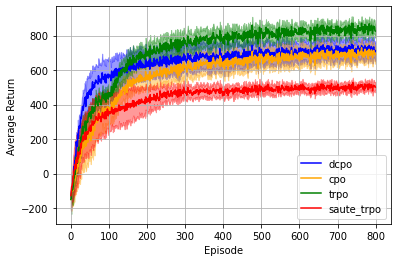

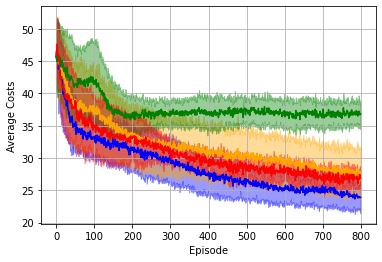

In [21]:
num_failed_seeds = 7
failed_data_dirs = [f'failed_data/data{i}/local/experiment' for i in range(1, num_failed_seeds+1)]

num_seeds = 2
data_dirs = [f'data{i}/' for i in range(1, num_seeds+1)]

plotter = RLPlotter(fdir=['dcpo_backlog', 'cpo_backlog', 'trpo_backlog', 'saute_trpo_backlog'] , data_dir=failed_data_dirs)
plotter.plot_returns()
plotter.plot_costs(use_legend=False)

In [1]:
from jaisalab.evaluation import Evaluator
from jaisalab.utils.eval import get_snapshot_dirs

In [2]:
snapshot_dirs = get_snapshot_dirs('data2/')

violation_rates = {}
for snapshot in snapshot_dirs:
    exp_name = snapshot.split('/')[-1]
    evaluator = Evaluator(snapshot)
    epochs = evaluator.rollout(n_epochs=10)
    violation_rates[exp_name] = evaluator.evaluate_paths(epochs)

/Users/jaimesabal/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/jaimesabal/Desktop/ICL/thesis/thesis_software_archive/garage/src/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(
Rolling out test batches...: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]
/Users/jaimesabal/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Rolling out test batches...: 100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


In [3]:
print(violation_rates)

{'saute_trpo_backlog': 25.30857142857143, 'dcpo_backlog': 21.117142857142856, 'cpo_backlog': 23.0, 'trpo_backlog': 36.494285714285716}
